## EDMD Tests on Duffing Oscillator

In [ ]:
import sys
sys.path.append('../..')
import PKoopmanDL as pkdl
import numpy as np
import matplotlib.pyplot as plt
import torch

# Define ODE
ode = pkdl.DuffingOscillator()

# Define flow map
dt = 1e-3
t_step = 0.25
flowmap = pkdl.ForwardEuler(t_step, dt)

# Generate data set
n_traj = 1000
traj_len = 10
x_min = torch.tensor([[-2, -1]])
x_max = torch.tensor([[2, 1]])
param = torch.tensor([[0.5, -1.0, 1.0]]).detach()
dataset = pkdl.ODEDataSet(ode, flowmap)
dataset.generate_data(n_traj, traj_len, x_min, x_max, param)

# build dictionary
dim_output = 100
dim_nontrain = 3
regularizer = 1e-4
nontrain_func = lambda x: torch.cat([torch.ones((x.shape[0], 1)), x], dim=1)
dictionary = pkdl.RBFDictionary(dataset.data_x, nontrain_func, ode.dim, dim_output, dim_nontrain, regularizer)

# build solver
solver = pkdl.EDMDSolver(dictionary)
K = solver.solve(dataset)


CUDA is available. GPU is being used.


## Plot 

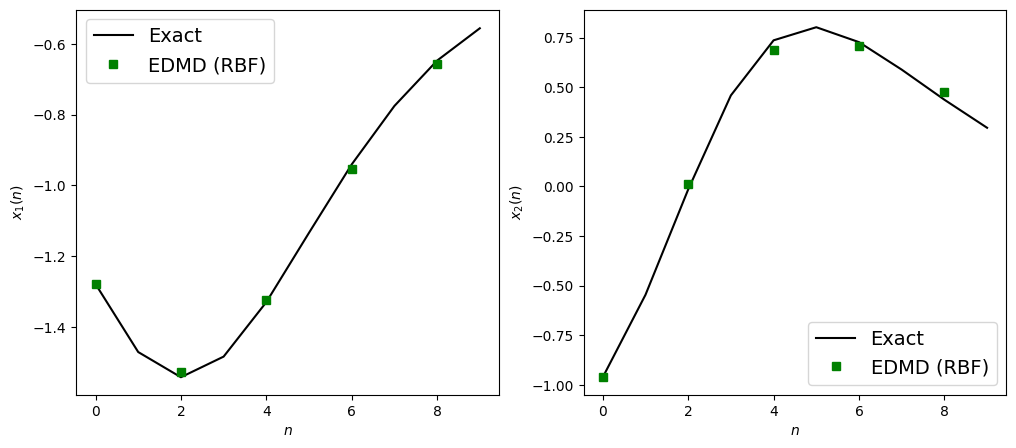

In [2]:
# predict
dataset_predict = pkdl.ODEDataSet(ode, flowmap)
dataset_predict.generate_data(1, traj_len, x_min, x_max, param)
x0 = torch.unsqueeze(dataset_predict.data_x[0], dim=0)
p = K.predict(x0, dictionary, dim_nontrain, traj_len)
x_est_traj = p[0, :, :]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,5))  
t_grid = np.arange(0, traj_len)
x_traj = dataset_predict.data_x
ax1.plot(t_grid, x_traj[:,0], 'k-', label='Exact', markevery=2)
ax1.plot(t_grid, x_est_traj[:,1], 'gs', label='EDMD (RBF)', markevery=2)

ax2.plot(t_grid, x_traj[:,1], 'k-', label='Exact', markevery=2)
ax2.plot(t_grid, x_est_traj[:,2], 'gs', label='EDMD (RBF)', markevery=2)

ax1.set_xlabel(r"$n$")
ax1.set_ylabel(r"$x_{1}(n)$")
ax1.legend(loc='best',prop={'size':14})

ax2.set_xlabel(r"$n$")
ax2.set_ylabel(r"$x_{2}(n)$")
ax2.legend(loc='best',prop={'size':14})